In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('./data/application_train.csv')
data_test = pd.read_csv('./data/application_test.csv')

In [3]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_train_1 = data_train.loc[data_train.loc[data_train.index,'TARGET']==1]
data_train_0 = data_train.loc[data_train.loc[data_train.index,'TARGET']==0]

data_train_1.shape, data_train_0.shape

((24825, 122), (282686, 122))

In [5]:
data_train_0 = data_train_0[:len(data_train_1)]

In [6]:
data_train_1.shape, data_train_0.shape

((24825, 122), (24825, 122))

In [7]:
data_train = pd.concat((data_train_0,data_train_1)).sort_index()
data_train.shape, data_test.shape

((49650, 122), (48744, 121))

In [8]:
del data_train_0
del data_train_1

In [9]:
data_train = data_train.set_index(data_train.SK_ID_CURR)
data_test = data_test.set_index(data_test.SK_ID_CURR)

data_train = data_train.drop('SK_ID_CURR',axis=1)
data_test = data_test.drop('SK_ID_CURR',axis=1)

In [10]:
%run ./code/label_encoder.py

In [15]:
#se codifican los datos tanto de entrenamiento y prueba
data_train = label_encoder(data_train)
data_test = label_encoder(data_test)

In [16]:
#saco la media de las columnas que presentan valores NaN
col_mean = (data_train.loc[:,data_train.count()<data_train.shape[0]].mean())
dict_col_mean = {}
for i in range(len(col_mean)):
    dict_col_mean[col_mean.index[i]] = col_mean[i]

In [17]:
#lo mismo para el data_test
col_mean_test = (data_test.loc[:,data_test.count()<data_test.shape[0]].mean())
dict_col_mean_test = {}
for i in range(len(col_mean_test)):
    dict_col_mean_test[col_mean_test.index[i]] = col_mean_test[i]

In [18]:
#se filtra con el diccionario obtenido anteriormente
data_train = data_train.fillna(value=dict_col_mean)
data_test = data_test.fillna(value=dict_col_mean_test)

In [19]:
y_train = data_train.TARGET

In [20]:
#para saber la correlación de los datos
matriz_corr = data_train.corr()

In [21]:
#se escogen las columnas mayormente correlacionadas
col_best = matriz_corr.loc[:,((matriz_corr > 0.5).sum() > 1)==True].columns

In [22]:
col_best

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
      

In [23]:
X_train = data_train[[col for col in  col_best if col!='TARGET']]
X_test = data_test[[col for col in  col_best if col!='TARGET']]

X_train.shape, y_train.shape, X_test.shape

((49650, 67), (49650,), (48744, 67))

### Ahora unimos con las aplicaciones previas de los clientes

In [24]:
pre_app = pd.read_csv('./data/previous_application.csv')

In [25]:
pre_app = pre_app.set_index(pre_app.SK_ID_CURR.values)
pre_app = pre_app.drop('SK_ID_CURR',axis=1)

In [28]:
pre_app.iloc[0,:]

SK_ID_PREV                                      2030495
NAME_CONTRACT_TYPE                       Consumer loans
AMT_ANNUITY                                     1730.43
AMT_APPLICATION                                   17145
AMT_CREDIT                                        17145
AMT_DOWN_PAYMENT                                      0
AMT_GOODS_PRICE                                   17145
WEEKDAY_APPR_PROCESS_START                     SATURDAY
HOUR_APPR_PROCESS_START                              15
FLAG_LAST_APPL_PER_CONTRACT                           Y
NFLAG_LAST_APPL_IN_DAY                                1
RATE_DOWN_PAYMENT                                     0
RATE_INTEREST_PRIMARY                          0.182832
RATE_INTEREST_PRIVILEGED                       0.867336
NAME_CASH_LOAN_PURPOSE                              XAP
NAME_CONTRACT_STATUS                           Approved
DAYS_DECISION                                       -73
NAME_PAYMENT_TYPE                 Cash through t

In [26]:
pre_app.isnull().sum()

SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA         

In [29]:
pre_app.shape

(1670214, 36)

In [30]:
pre_app = pre_app.groupby(pre_app.index).mean()

In [31]:
pre_app.shape

(338857, 20)

In [32]:
pre_app = pre_app.drop('SK_ID_PREV',axis=1)
pre_app.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
100001,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,NaN,NaN,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
100002,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,NaN,NaN,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
100003,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,NaN,NaN,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
100004,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,NaN,NaN,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
100005,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,NaN,NaN,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


In [33]:
#como se ve, algunos clientes no tienen aplicaciones previas, entonces se saca la media de los otros para agregarlos
pre_app.filter(X_train.index, axis=0).shape

(47353, 19)

In [34]:
#saco la media de las columnas que presentan valores NaN
col_mean = (pre_app.loc[:,pre_app.count()<pre_app.shape[0]].mean())
dict_col_mean = {}
for i in range(len(col_mean)):
    dict_col_mean[col_mean.index[i]] = col_mean[i]

In [35]:
dict_col_mean

{'AMT_ANNUITY': 14656.028969562485,
 'AMT_DOWN_PAYMENT': 7118.1339642601442,
 'AMT_GOODS_PRICE': 195384.32229748537,
 'CNT_PAYMENT': 14.533386696241354,
 'DAYS_FIRST_DRAWING': 343239.5237625381,
 'DAYS_FIRST_DUE': 11751.270188291879,
 'DAYS_LAST_DUE': 80408.826486174323,
 'DAYS_LAST_DUE_1ST_VERSION': 30789.161995893697,
 'DAYS_TERMINATION': 86680.458349602282,
 'NFLAG_INSURED_ON_APPROVAL': 0.28067278376515808,
 'RATE_DOWN_PAYMENT': 0.081418004972630451,
 'RATE_INTEREST_PRIMARY': 0.18873003316224804,
 'RATE_INTEREST_PRIVILEGED': 0.77325373526484986}

In [36]:
pre_app = pre_app.fillna(value=dict_col_mean)

In [37]:
matriz_corr = pre_app.corr()

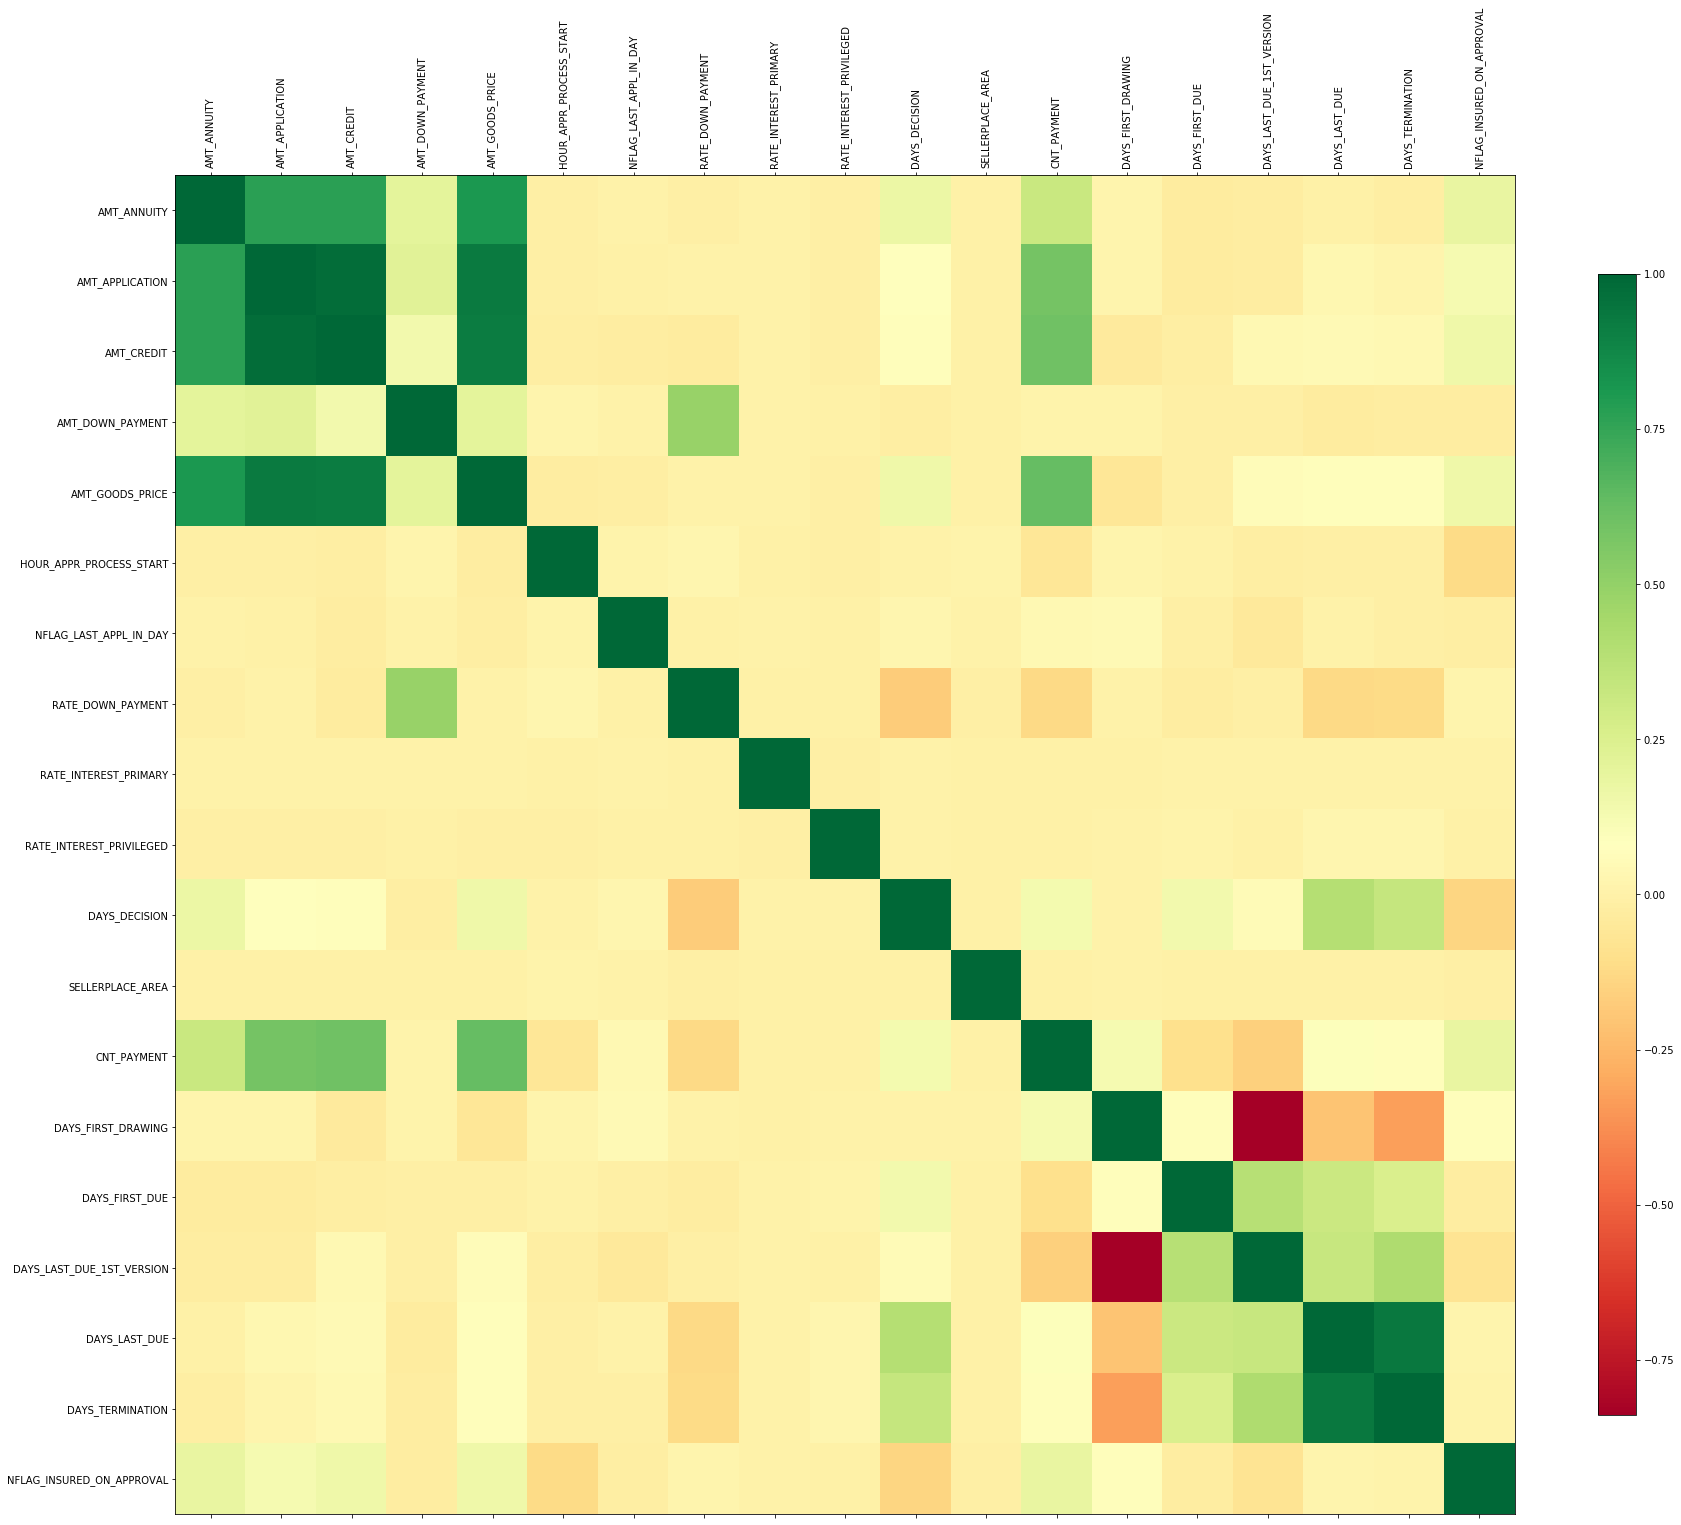

In [38]:
fig, ax = plt.subplots(figsize=(30,30))
cax = ax.matshow(matriz_corr, cmap='RdYlGn')
plt.xticks(range(len(matriz_corr.columns)), matriz_corr.columns, rotation=90)
plt.yticks(range(len(matriz_corr.columns)), matriz_corr.columns)

fig.colorbar(cax, shrink=.7, aspect=30);

In [39]:
#se escogen las columnas mayormente correlacionadas
col_best = matriz_corr.loc[:,((matriz_corr > 0.5).sum() > 1)==True].columns

In [40]:
col_best

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CNT_PAYMENT', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [42]:
pre_app = pre_app[[col for col in col_best]]

In [43]:
pre_app.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_LAST_DUE,DAYS_TERMINATION
100001,3951.000,24835.50,23787.00,24835.5,8.0,-1619.000000,-1612.000000
100002,9251.775,179055.00,179055.00,179055.0,24.0,-25.000000,-17.000000
100003,56553.990,435436.50,484191.00,435436.5,10.0,-1054.333333,-1047.333333
100004,5357.250,24282.00,20106.00,24282.0,4.0,-724.000000,-714.000000
100005,4813.200,22308.75,20076.75,44617.5,12.0,-466.000000,-460.000000


In [44]:
X_train_merge = pd.merge(X_train, pre_app, left_index=True, right_index=True, how='left')
X_test_merge = pd.merge(X_test, pre_app, left_index=True, right_index=True, how='left')

X_train_merge.shape, X_test_merge.shape

((49650, 74), (48744, 74))

In [46]:
X_train_merge.head()

,CNT_CHILDREN,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_6,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,DAYS_LAST_DUE,DAYS_TERMINATION
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,406597.5,24700.5,351000.0,-9461,-637,1,1.0,2,2,...,2.0,2.0,0,9251.775,179055.00,179055.00,179055.00,24.000000,-25.000000,-17.000000
100003,0,1293502.5,35698.5,1129500.0,-16765,-1188,1,2.0,1,1,...,1.0,0.0,0,56553.990,435436.50,484191.00,435436.50,10.000000,-1054.333333,-1047.333333
100004,0,135000.0,6750.0,135000.0,-19046,-225,1,1.0,2,2,...,0.0,0.0,0,5357.250,24282.00,20106.00,24282.00,4.000000,-724.000000,-714.000000
100006,0,312682.5,29686.5,297000.0,-19005,-3039,1,2.0,2,2,...,2.0,0.0,0,23651.175,272203.26,291695.50,408304.89,23.000000,182477.500000,182481.750000
100007,0,513000.0,21865.5,513000.0,-19932,-3038,1,1.0,2,2,...,0.0,0.0,0,12278.805,150530.25,166638.75,150530.25,20.666667,72136.200000,72143.800000


como se crean NaN debido a que hay usuarios sin datos previos, se les pone la media de los datos ya existentes

In [47]:
#lo mismo para el data_train
col_mean_train = (X_train_merge.loc[:,X_train_merge.count()<X_train_merge.shape[0]].mean())
dict_col_mean_train = {}
for i in range(len(col_mean_train)):
    dict_col_mean_train[col_mean_train.index[i]] = col_mean_train[i]
    
#lo mismo para el data_test
col_mean_test = (X_test_merge.loc[:,X_test_merge.count()<X_test_merge.shape[0]].mean())
dict_col_mean_test = {}
for i in range(len(col_mean_test)):
    dict_col_mean_test[col_mean_test.index[i]] = col_mean_test[i]

In [48]:
X_train_merge = X_train_merge.fillna(value=dict_col_mean_train)
X_test_merge = X_test_merge.fillna(value=dict_col_mean_test)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train_merge, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
GBC.score(X_train_merge, y_train)

0.63764350453172203

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=3, n_estimators=15)

In [52]:
rfc.fit(X_train_merge, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rfc.score(X_train_merge, y_train)

0.99617321248741186

In [54]:
predict = rfc.predict_proba(X_test_merge)

In [55]:
#con una correlación mayor a 0.5
result = pd.DataFrame(data=predict[:,1], index=X_test_merge.index, columns=['TARGET'])
result.index.name = 'SK_ID_CURR'
result.to_csv('./results/submission_test_27.csv')

### Probaré unas redes neuronales recurrentes, a ver que tal van...

In [62]:
from  keras.models  import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_merge = scaler.fit_transform(X_train_merge)
X_test_merge = scaler.fit_transform(X_test_merge)

In [59]:
#redimensionarlos como los pide keras
X_train_merge = X_train_merge.reshape(X_train_merge.shape[0],1,X_train_merge.shape[1])
X_test_merge = X_test_merge.reshape(X_test_merge.shape[0],1,X_test_merge.shape[1])

In [60]:
X_train_merge.shape, X_test_merge.shape

((49650, 1, 74), (48744, 1, 74))

In [84]:
model = Sequential()
model.add(LSTM(64, input_shape=(1,X_train_merge.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
#model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [85]:
model.fit(X_train_merge, y_train, batch_size=1000, epochs=3000)

Epoch 1/3000
49650/49650 [==============================] - 3s - loss: 0.6860 - acc: 0.5541     
Epoch 2/3000
49650/49650 [==============================] - 3s - loss: 0.6763 - acc: 0.5757     
Epoch 3/3000
49650/49650 [==============================] - 3s - loss: 0.6730 - acc: 0.5851     
Epoch 4/3000
49650/49650 [==============================] - 3s - loss: 0.6712 - acc: 0.5865     
Epoch 5/3000
49650/49650 [==============================] - 3s - loss: 0.6690 - acc: 0.5917     
Epoch 6/3000
49650/49650 [==============================] - 3s - loss: 0.6684 - acc: 0.5918     
Epoch 7/3000
49650/49650 [==============================] - 3s - loss: 0.6681 - acc: 0.5941     
Epoch 8/3000
49650/49650 [==============================] - 3s - loss: 0.6672 - acc: 0.5955     
Epoch 9/3000
49650/49650 [==============================] - 3s - loss: 0.6669 - acc: 0.5973     
Epoch 10/3000
49650/49650 [==============================] - 3s - loss: 0.6668 - acc: 0.5969     
Epoch 11/3000
49650/49650 [==

49650/49650 [==============================] - 3s - loss: 0.6494 - acc: 0.6203     
Epoch 83/3000
49650/49650 [==============================] - 3s - loss: 0.6486 - acc: 0.6215     
Epoch 84/3000
49650/49650 [==============================] - 3s - loss: 0.6492 - acc: 0.6225     
Epoch 85/3000
49650/49650 [==============================] - 3s - loss: 0.6493 - acc: 0.6210     
Epoch 86/3000
49650/49650 [==============================] - 3s - loss: 0.6486 - acc: 0.6224     
Epoch 87/3000
49650/49650 [==============================] - 3s - loss: 0.6492 - acc: 0.6199     
Epoch 88/3000
49650/49650 [==============================] - 3s - loss: 0.6483 - acc: 0.6212     
Epoch 89/3000
49650/49650 [==============================] - 3s - loss: 0.6486 - acc: 0.6209     
Epoch 90/3000
49650/49650 [==============================] - 3s - loss: 0.6487 - acc: 0.6210     
Epoch 91/3000
49650/49650 [==============================] - 3s - loss: 0.6481 - acc: 0.6234     
Epoch 92/3000
49650/49650 [=======

49650/49650 [==============================] - 3s - loss: 0.6386 - acc: 0.6331     
Epoch 165/3000
49650/49650 [==============================] - 3s - loss: 0.6387 - acc: 0.6325     
Epoch 166/3000
49650/49650 [==============================] - 3s - loss: 0.6386 - acc: 0.6323     
Epoch 167/3000
49650/49650 [==============================] - 3s - loss: 0.6375 - acc: 0.6327     
Epoch 168/3000
49650/49650 [==============================] - 3s - loss: 0.6386 - acc: 0.6316     
Epoch 169/3000
49650/49650 [==============================] - 3s - loss: 0.6389 - acc: 0.6297     
Epoch 170/3000
49650/49650 [==============================] - 3s - loss: 0.6384 - acc: 0.6325     
Epoch 171/3000
49650/49650 [==============================] - 3s - loss: 0.6392 - acc: 0.6310     
Epoch 172/3000
49650/49650 [==============================] - 3s - loss: 0.6379 - acc: 0.6328     
Epoch 173/3000
49650/49650 [==============================] - 3s - loss: 0.6364 - acc: 0.6351     
Epoch 174/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6320 - acc: 0.6391     
Epoch 247/3000
49650/49650 [==============================] - 3s - loss: 0.6309 - acc: 0.6401     
Epoch 248/3000
49650/49650 [==============================] - 3s - loss: 0.6323 - acc: 0.6394     
Epoch 249/3000
49650/49650 [==============================] - 3s - loss: 0.6325 - acc: 0.6377     
Epoch 250/3000
49650/49650 [==============================] - 3s - loss: 0.6320 - acc: 0.6375     
Epoch 251/3000
49650/49650 [==============================] - 3s - loss: 0.6319 - acc: 0.6398     
Epoch 252/3000
49650/49650 [==============================] - 3s - loss: 0.6313 - acc: 0.6398     
Epoch 253/3000
49650/49650 [==============================] - 3s - loss: 0.6310 - acc: 0.6399     
Epoch 254/3000
49650/49650 [==============================] - 3s - loss: 0.6317 - acc: 0.6392     
Epoch 255/3000
49650/49650 [==============================] - 3s - loss: 0.6304 - acc: 0.6411     
Epoch 256/3000
49650/4965

49650/49650 [==============================] - 4s - loss: 0.6252 - acc: 0.6444     
Epoch 329/3000
49650/49650 [==============================] - 4s - loss: 0.6253 - acc: 0.6460     
Epoch 330/3000
49650/49650 [==============================] - 4s - loss: 0.6261 - acc: 0.6423     
Epoch 331/3000
49650/49650 [==============================] - 3s - loss: 0.6245 - acc: 0.6434     
Epoch 332/3000
49650/49650 [==============================] - 3s - loss: 0.6255 - acc: 0.6459     
Epoch 333/3000
49650/49650 [==============================] - 3s - loss: 0.6245 - acc: 0.6440     
Epoch 334/3000
49650/49650 [==============================] - 3s - loss: 0.6256 - acc: 0.6435     
Epoch 335/3000
49650/49650 [==============================] - 3s - loss: 0.6248 - acc: 0.6460     
Epoch 336/3000
49650/49650 [==============================] - 3s - loss: 0.6261 - acc: 0.6411     
Epoch 337/3000
49650/49650 [==============================] - 3s - loss: 0.6258 - acc: 0.6433     
Epoch 338/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6196 - acc: 0.6490     
Epoch 411/3000
49650/49650 [==============================] - 3s - loss: 0.6197 - acc: 0.6498     
Epoch 412/3000
49650/49650 [==============================] - 3s - loss: 0.6189 - acc: 0.6511     
Epoch 413/3000
49650/49650 [==============================] - 3s - loss: 0.6180 - acc: 0.6504     
Epoch 414/3000
49650/49650 [==============================] - 3s - loss: 0.6200 - acc: 0.6508     
Epoch 415/3000
49650/49650 [==============================] - 3s - loss: 0.6202 - acc: 0.6494     
Epoch 416/3000
49650/49650 [==============================] - 3s - loss: 0.6195 - acc: 0.6506     
Epoch 417/3000
49650/49650 [==============================] - 3s - loss: 0.6203 - acc: 0.6486     
Epoch 418/3000
49650/49650 [==============================] - 3s - loss: 0.6188 - acc: 0.6497     
Epoch 419/3000
49650/49650 [==============================] - 3s - loss: 0.6200 - acc: 0.6489     
Epoch 420/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6145 - acc: 0.6533     
Epoch 493/3000
49650/49650 [==============================] - 3s - loss: 0.6146 - acc: 0.6553     
Epoch 494/3000
49650/49650 [==============================] - 3s - loss: 0.6141 - acc: 0.6526     
Epoch 495/3000
49650/49650 [==============================] - 3s - loss: 0.6152 - acc: 0.6534     
Epoch 496/3000
49650/49650 [==============================] - 3s - loss: 0.6149 - acc: 0.6533     
Epoch 497/3000
49650/49650 [==============================] - 3s - loss: 0.6152 - acc: 0.6546     
Epoch 498/3000
49650/49650 [==============================] - 3s - loss: 0.6143 - acc: 0.6539     
Epoch 499/3000
49650/49650 [==============================] - 3s - loss: 0.6135 - acc: 0.6565     
Epoch 500/3000
49650/49650 [==============================] - 3s - loss: 0.6137 - acc: 0.6540     
Epoch 501/3000
49650/49650 [==============================] - 3s - loss: 0.6156 - acc: 0.6539     
Epoch 502/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6107 - acc: 0.6610     
Epoch 574/3000
49650/49650 [==============================] - 3s - loss: 0.6093 - acc: 0.6574     
Epoch 575/3000
49650/49650 [==============================] - 3s - loss: 0.6102 - acc: 0.6577     
Epoch 576/3000
49650/49650 [==============================] - 3s - loss: 0.6095 - acc: 0.6576     
Epoch 577/3000
49650/49650 [==============================] - 3s - loss: 0.6100 - acc: 0.6575     
Epoch 578/3000
49650/49650 [==============================] - 3s - loss: 0.6096 - acc: 0.6596     
Epoch 579/3000
49650/49650 [==============================] - 3s - loss: 0.6115 - acc: 0.6573     
Epoch 580/3000
49650/49650 [==============================] - 3s - loss: 0.6096 - acc: 0.6564     
Epoch 581/3000
49650/49650 [==============================] - 3s - loss: 0.6101 - acc: 0.6582     
Epoch 582/3000
49650/49650 [==============================] - 3s - loss: 0.6110 - acc: 0.6584     
Epoch 583/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6049 - acc: 0.6626     
Epoch 656/3000
49650/49650 [==============================] - 3s - loss: 0.6084 - acc: 0.6590     
Epoch 657/3000
49650/49650 [==============================] - 3s - loss: 0.6052 - acc: 0.6616     
Epoch 658/3000
49650/49650 [==============================] - 3s - loss: 0.6050 - acc: 0.6642     
Epoch 659/3000
49650/49650 [==============================] - 3s - loss: 0.6058 - acc: 0.6619     
Epoch 660/3000
49650/49650 [==============================] - 3s - loss: 0.6056 - acc: 0.6610     
Epoch 661/3000
49650/49650 [==============================] - 3s - loss: 0.6059 - acc: 0.6608     
Epoch 662/3000
49650/49650 [==============================] - 3s - loss: 0.6057 - acc: 0.6621     
Epoch 663/3000
49650/49650 [==============================] - 4s - loss: 0.6055 - acc: 0.6612     
Epoch 664/3000
49650/49650 [==============================] - 4s - loss: 0.6059 - acc: 0.6618     
Epoch 665/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.6028 - acc: 0.6636     
Epoch 736/3000
49650/49650 [==============================] - 3s - loss: 0.6023 - acc: 0.6652     
Epoch 737/3000
49650/49650 [==============================] - 3s - loss: 0.6007 - acc: 0.6663     
Epoch 738/3000
49650/49650 [==============================] - 3s - loss: 0.6012 - acc: 0.6642     
Epoch 739/3000
49650/49650 [==============================] - 3s - loss: 0.6025 - acc: 0.6639     
Epoch 740/3000
49650/49650 [==============================] - 3s - loss: 0.6019 - acc: 0.6658     
Epoch 741/3000
49650/49650 [==============================] - 3s - loss: 0.6005 - acc: 0.6632     
Epoch 742/3000
49650/49650 [==============================] - 3s - loss: 0.6026 - acc: 0.6633     
Epoch 743/3000
49650/49650 [==============================] - 3s - loss: 0.6018 - acc: 0.6642     
Epoch 744/3000
49650/49650 [==============================] - 3s - loss: 0.6002 - acc: 0.6665     
Epoch 745/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.5992 - acc: 0.6672     
Epoch 818/3000
49650/49650 [==============================] - 3s - loss: 0.5984 - acc: 0.6650     
Epoch 819/3000
49650/49650 [==============================] - 3s - loss: 0.6008 - acc: 0.6651     
Epoch 820/3000
49650/49650 [==============================] - 3s - loss: 0.5961 - acc: 0.6698     
Epoch 821/3000
49650/49650 [==============================] - 3s - loss: 0.5981 - acc: 0.6674     
Epoch 822/3000
49650/49650 [==============================] - 3s - loss: 0.5985 - acc: 0.6684     
Epoch 823/3000
49650/49650 [==============================] - 3s - loss: 0.5983 - acc: 0.6656     
Epoch 824/3000
49650/49650 [==============================] - 3s - loss: 0.5970 - acc: 0.6701     
Epoch 825/3000
49650/49650 [==============================] - 3s - loss: 0.5984 - acc: 0.6648     
Epoch 826/3000
49650/49650 [==============================] - 3s - loss: 0.5981 - acc: 0.6682     
Epoch 827/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.5947 - acc: 0.6709     
Epoch 900/3000
49650/49650 [==============================] - 3s - loss: 0.5953 - acc: 0.6702     
Epoch 901/3000
49650/49650 [==============================] - 3s - loss: 0.5949 - acc: 0.6688     
Epoch 902/3000
49650/49650 [==============================] - 3s - loss: 0.5933 - acc: 0.6693     
Epoch 903/3000
49650/49650 [==============================] - 3s - loss: 0.5943 - acc: 0.6684     
Epoch 904/3000
49650/49650 [==============================] - 3s - loss: 0.5954 - acc: 0.6726     
Epoch 905/3000
49650/49650 [==============================] - 3s - loss: 0.5946 - acc: 0.6714     
Epoch 906/3000
49650/49650 [==============================] - 3s - loss: 0.5945 - acc: 0.6712     
Epoch 907/3000
49650/49650 [==============================] - 3s - loss: 0.5940 - acc: 0.6702     
Epoch 908/3000
49650/49650 [==============================] - 3s - loss: 0.5956 - acc: 0.6707     
Epoch 909/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.5903 - acc: 0.6750     
Epoch 981/3000
49650/49650 [==============================] - 3s - loss: 0.5905 - acc: 0.6741     
Epoch 982/3000
49650/49650 [==============================] - 3s - loss: 0.5904 - acc: 0.6738     
Epoch 983/3000
49650/49650 [==============================] - 3s - loss: 0.5919 - acc: 0.6735     
Epoch 984/3000
49650/49650 [==============================] - 3s - loss: 0.5904 - acc: 0.6741     
Epoch 985/3000
49650/49650 [==============================] - 3s - loss: 0.5919 - acc: 0.6729     
Epoch 986/3000
49650/49650 [==============================] - 3s - loss: 0.5925 - acc: 0.6718     
Epoch 987/3000
49650/49650 [==============================] - 3s - loss: 0.5918 - acc: 0.6734     
Epoch 988/3000
49650/49650 [==============================] - 3s - loss: 0.5905 - acc: 0.6741     
Epoch 989/3000
49650/49650 [==============================] - 3s - loss: 0.5955 - acc: 0.6716     
Epoch 990/3000
49650/4965

49650/49650 [==============================] - 3s - loss: 0.5865 - acc: 0.6760     
Epoch 1061/3000
49650/49650 [==============================] - 3s - loss: 0.5877 - acc: 0.6739     
Epoch 1062/3000
49650/49650 [==============================] - 3s - loss: 0.5884 - acc: 0.6731     
Epoch 1063/3000
49650/49650 [==============================] - 3s - loss: 0.5894 - acc: 0.6743     
Epoch 1064/3000
49650/49650 [==============================] - 3s - loss: 0.5883 - acc: 0.6763     
Epoch 1065/3000
49650/49650 [==============================] - 3s - loss: 0.5893 - acc: 0.6741     
Epoch 1066/3000
49650/49650 [==============================] - 3s - loss: 0.5898 - acc: 0.6753     
Epoch 1067/3000
49650/49650 [==============================] - 3s - loss: 0.5901 - acc: 0.6739     
Epoch 1068/3000
49650/49650 [==============================] - 3s - loss: 0.5880 - acc: 0.6758     
Epoch 1069/3000
49650/49650 [==============================] - 3s - loss: 0.5875 - acc: 0.6761     
Epoch 1070/3000


49650/49650 [==============================] - 3s - loss: 0.5882 - acc: 0.6765     
Epoch 1143/3000
49650/49650 [==============================] - 3s - loss: 0.5854 - acc: 0.6762     
Epoch 1144/3000
49650/49650 [==============================] - 3s - loss: 0.5876 - acc: 0.6752     
Epoch 1145/3000
49650/49650 [==============================] - 3s - loss: 0.5850 - acc: 0.6766     
Epoch 1146/3000
49650/49650 [==============================] - 3s - loss: 0.5848 - acc: 0.6771     
Epoch 1147/3000
49650/49650 [==============================] - 3s - loss: 0.5855 - acc: 0.6771     
Epoch 1148/3000
49650/49650 [==============================] - 3s - loss: 0.5869 - acc: 0.6762     
Epoch 1149/3000
49650/49650 [==============================] - 3s - loss: 0.5861 - acc: 0.6781     
Epoch 1150/3000
49650/49650 [==============================] - 3s - loss: 0.5859 - acc: 0.6780     
Epoch 1151/3000
49650/49650 [==============================] - 3s - loss: 0.5868 - acc: 0.6775     
Epoch 1152/3000


49650/49650 [==============================] - 3s - loss: 0.5825 - acc: 0.6798     
Epoch 1224/3000
49650/49650 [==============================] - 3s - loss: 0.5843 - acc: 0.6780     
Epoch 1225/3000
49650/49650 [==============================] - 3s - loss: 0.5833 - acc: 0.6792     
Epoch 1226/3000
49650/49650 [==============================] - 3s - loss: 0.5828 - acc: 0.6796     
Epoch 1227/3000
49650/49650 [==============================] - 3s - loss: 0.5843 - acc: 0.6788     
Epoch 1228/3000
49650/49650 [==============================] - 3s - loss: 0.5834 - acc: 0.6788     
Epoch 1229/3000
49650/49650 [==============================] - 3s - loss: 0.5829 - acc: 0.6771     
Epoch 1230/3000
49650/49650 [==============================] - 3s - loss: 0.5830 - acc: 0.6790     
Epoch 1231/3000
49650/49650 [==============================] - 3s - loss: 0.5853 - acc: 0.6784     
Epoch 1232/3000
49650/49650 [==============================] - 3s - loss: 0.5827 - acc: 0.6811     
Epoch 1233/3000


49650/49650 [==============================] - 3s - loss: 0.5828 - acc: 0.6802     
Epoch 1306/3000
49650/49650 [==============================] - 3s - loss: 0.5793 - acc: 0.6832     
Epoch 1307/3000
49650/49650 [==============================] - 3s - loss: 0.5823 - acc: 0.6804     
Epoch 1308/3000
49650/49650 [==============================] - 3s - loss: 0.5824 - acc: 0.6789     
Epoch 1309/3000
49650/49650 [==============================] - 3s - loss: 0.5790 - acc: 0.6833     
Epoch 1310/3000
49650/49650 [==============================] - 3s - loss: 0.5822 - acc: 0.6780     
Epoch 1311/3000
49650/49650 [==============================] - 3s - loss: 0.5812 - acc: 0.6811     
Epoch 1312/3000
49650/49650 [==============================] - 3s - loss: 0.5833 - acc: 0.6795     
Epoch 1313/3000
49650/49650 [==============================] - 3s - loss: 0.5808 - acc: 0.6813     
Epoch 1314/3000
49650/49650 [==============================] - 3s - loss: 0.5797 - acc: 0.6823     
Epoch 1315/3000


49650/49650 [==============================] - 3s - loss: 0.5771 - acc: 0.6835     
Epoch 1387/3000
49650/49650 [==============================] - 3s - loss: 0.5758 - acc: 0.6873     
Epoch 1388/3000
49650/49650 [==============================] - 3s - loss: 0.5784 - acc: 0.6833     
Epoch 1389/3000
49650/49650 [==============================] - 3s - loss: 0.5768 - acc: 0.6854     
Epoch 1390/3000
49650/49650 [==============================] - 3s - loss: 0.5807 - acc: 0.6818     
Epoch 1391/3000
49650/49650 [==============================] - 3s - loss: 0.5786 - acc: 0.6823     
Epoch 1392/3000
49650/49650 [==============================] - 3s - loss: 0.5795 - acc: 0.6822     
Epoch 1393/3000
49650/49650 [==============================] - 3s - loss: 0.5769 - acc: 0.6850     
Epoch 1394/3000
49650/49650 [==============================] - 3s - loss: 0.5799 - acc: 0.6827     
Epoch 1395/3000
49650/49650 [==============================] - 3s - loss: 0.5787 - acc: 0.6825     
Epoch 1396/3000


49650/49650 [==============================] - 3s - loss: 0.5774 - acc: 0.6817     
Epoch 1469/3000
49650/49650 [==============================] - 3s - loss: 0.5756 - acc: 0.6872     
Epoch 1470/3000
49650/49650 [==============================] - 3s - loss: 0.5765 - acc: 0.6877     
Epoch 1471/3000
49650/49650 [==============================] - 3s - loss: 0.5751 - acc: 0.6880     
Epoch 1472/3000
49650/49650 [==============================] - 3s - loss: 0.5752 - acc: 0.6861     
Epoch 1473/3000
49650/49650 [==============================] - 3s - loss: 0.5780 - acc: 0.6840     
Epoch 1474/3000
49650/49650 [==============================] - 3s - loss: 0.5761 - acc: 0.6854     
Epoch 1475/3000
49650/49650 [==============================] - 3s - loss: 0.5768 - acc: 0.6862     
Epoch 1476/3000
49650/49650 [==============================] - 3s - loss: 0.5766 - acc: 0.6857     
Epoch 1477/3000
49650/49650 [==============================] - 3s - loss: 0.5743 - acc: 0.6850     
Epoch 1478/3000


49650/49650 [==============================] - 3s - loss: 0.5730 - acc: 0.6879     
Epoch 1551/3000
49650/49650 [==============================] - 3s - loss: 0.5751 - acc: 0.6851     
Epoch 1552/3000
49650/49650 [==============================] - 3s - loss: 0.5749 - acc: 0.6863     
Epoch 1553/3000
49650/49650 [==============================] - 3s - loss: 0.5774 - acc: 0.6840     
Epoch 1554/3000
49650/49650 [==============================] - 3s - loss: 0.5744 - acc: 0.6874     
Epoch 1555/3000
49650/49650 [==============================] - 3s - loss: 0.5737 - acc: 0.6882     
Epoch 1556/3000
49650/49650 [==============================] - 3s - loss: 0.5727 - acc: 0.6886     
Epoch 1557/3000
49650/49650 [==============================] - 3s - loss: 0.5730 - acc: 0.6868     
Epoch 1558/3000
49650/49650 [==============================] - 3s - loss: 0.5744 - acc: 0.6868     
Epoch 1559/3000
49650/49650 [==============================] - 3s - loss: 0.5739 - acc: 0.6855     
Epoch 1560/3000


49650/49650 [==============================] - 3s - loss: 0.5733 - acc: 0.6879     
Epoch 1632/3000
49650/49650 [==============================] - 3s - loss: 0.5725 - acc: 0.6877     
Epoch 1633/3000
49650/49650 [==============================] - 3s - loss: 0.5734 - acc: 0.6889     
Epoch 1634/3000
49650/49650 [==============================] - 3s - loss: 0.5701 - acc: 0.6907     
Epoch 1635/3000
49650/49650 [==============================] - 3s - loss: 0.5725 - acc: 0.6884     
Epoch 1636/3000
49650/49650 [==============================] - 3s - loss: 0.5710 - acc: 0.6877     
Epoch 1637/3000
49650/49650 [==============================] - 2s - loss: 0.5723 - acc: 0.6881     
Epoch 1638/3000
49650/49650 [==============================] - 2s - loss: 0.5702 - acc: 0.6891     
Epoch 1639/3000
49650/49650 [==============================] - 3s - loss: 0.5724 - acc: 0.6900     
Epoch 1640/3000
49650/49650 [==============================] - 3s - loss: 0.5693 - acc: 0.6907     
Epoch 1641/3000


49650/49650 [==============================] - 3s - loss: 0.5707 - acc: 0.6897     
Epoch 1713/3000
49650/49650 [==============================] - 3s - loss: 0.5697 - acc: 0.6890     
Epoch 1714/3000
49650/49650 [==============================] - 3s - loss: 0.5721 - acc: 0.6900     
Epoch 1715/3000
49650/49650 [==============================] - 3s - loss: 0.5709 - acc: 0.6885     
Epoch 1716/3000
49650/49650 [==============================] - 3s - loss: 0.5672 - acc: 0.6916     
Epoch 1717/3000
49650/49650 [==============================] - 3s - loss: 0.5706 - acc: 0.6903     
Epoch 1718/3000
49650/49650 [==============================] - 3s - loss: 0.5720 - acc: 0.6890     
Epoch 1719/3000
49650/49650 [==============================] - 3s - loss: 0.5703 - acc: 0.6890     
Epoch 1720/3000
49650/49650 [==============================] - 3s - loss: 0.5701 - acc: 0.6903     
Epoch 1721/3000
49650/49650 [==============================] - 3s - loss: 0.5696 - acc: 0.6903     
Epoch 1722/3000


49650/49650 [==============================] - 3s - loss: 0.5686 - acc: 0.6888     
Epoch 1794/3000
49650/49650 [==============================] - 3s - loss: 0.5700 - acc: 0.6910     
Epoch 1795/3000
49650/49650 [==============================] - 3s - loss: 0.5717 - acc: 0.6895     
Epoch 1796/3000
49650/49650 [==============================] - 3s - loss: 0.5687 - acc: 0.6917     
Epoch 1797/3000
49650/49650 [==============================] - 3s - loss: 0.5682 - acc: 0.6931     
Epoch 1798/3000
49650/49650 [==============================] - 3s - loss: 0.5660 - acc: 0.6946     
Epoch 1799/3000
49650/49650 [==============================] - 3s - loss: 0.5678 - acc: 0.6914     
Epoch 1800/3000
49650/49650 [==============================] - 3s - loss: 0.5674 - acc: 0.6908     
Epoch 1801/3000
49650/49650 [==============================] - 3s - loss: 0.5679 - acc: 0.6920     
Epoch 1802/3000
49650/49650 [==============================] - 3s - loss: 0.5671 - acc: 0.6890     
Epoch 1803/3000


49650/49650 [==============================] - 3s - loss: 0.5644 - acc: 0.6936     
Epoch 1876/3000
49650/49650 [==============================] - 3s - loss: 0.5656 - acc: 0.6947     
Epoch 1877/3000
49650/49650 [==============================] - 3s - loss: 0.5665 - acc: 0.6935     
Epoch 1878/3000
49650/49650 [==============================] - 3s - loss: 0.5653 - acc: 0.6933     
Epoch 1879/3000
49650/49650 [==============================] - 3s - loss: 0.5665 - acc: 0.6918     
Epoch 1880/3000
49650/49650 [==============================] - 3s - loss: 0.5623 - acc: 0.6968     
Epoch 1881/3000
49650/49650 [==============================] - 3s - loss: 0.5675 - acc: 0.6928     
Epoch 1882/3000
49650/49650 [==============================] - 3s - loss: 0.5641 - acc: 0.6961     
Epoch 1883/3000
49650/49650 [==============================] - 3s - loss: 0.5652 - acc: 0.6924     
Epoch 1884/3000
49650/49650 [==============================] - 3s - loss: 0.5646 - acc: 0.6934     
Epoch 1885/3000


49650/49650 [==============================] - 3s - loss: 0.5645 - acc: 0.6940     
Epoch 1958/3000
49650/49650 [==============================] - 3s - loss: 0.5650 - acc: 0.6943     
Epoch 1959/3000
49650/49650 [==============================] - 3s - loss: 0.5669 - acc: 0.6914     
Epoch 1960/3000
49650/49650 [==============================] - 3s - loss: 0.5654 - acc: 0.6953     
Epoch 1961/3000
49650/49650 [==============================] - 3s - loss: 0.5657 - acc: 0.6943     
Epoch 1962/3000
49650/49650 [==============================] - 3s - loss: 0.5644 - acc: 0.6953     
Epoch 1963/3000
49650/49650 [==============================] - 3s - loss: 0.5634 - acc: 0.6953     
Epoch 1964/3000
49650/49650 [==============================] - 3s - loss: 0.5647 - acc: 0.6948     
Epoch 1965/3000
49650/49650 [==============================] - 3s - loss: 0.5633 - acc: 0.6966     
Epoch 1966/3000
49650/49650 [==============================] - 3s - loss: 0.5635 - acc: 0.6957     
Epoch 1967/3000


49650/49650 [==============================] - 3s - loss: 0.5640 - acc: 0.6943     
Epoch 2040/3000
49650/49650 [==============================] - 3s - loss: 0.5622 - acc: 0.6963     
Epoch 2041/3000
49650/49650 [==============================] - 3s - loss: 0.5616 - acc: 0.6956     
Epoch 2042/3000
49650/49650 [==============================] - 3s - loss: 0.5626 - acc: 0.6967     
Epoch 2043/3000
49650/49650 [==============================] - 3s - loss: 0.5625 - acc: 0.6963     
Epoch 2044/3000
49650/49650 [==============================] - 3s - loss: 0.5622 - acc: 0.6984     
Epoch 2045/3000
49650/49650 [==============================] - 3s - loss: 0.5633 - acc: 0.6965     
Epoch 2046/3000
49650/49650 [==============================] - 3s - loss: 0.5620 - acc: 0.6981     
Epoch 2047/3000
49650/49650 [==============================] - 3s - loss: 0.5624 - acc: 0.6983     
Epoch 2048/3000
49650/49650 [==============================] - 3s - loss: 0.5615 - acc: 0.6977     
Epoch 2049/3000


49650/49650 [==============================] - 3s - loss: 0.5611 - acc: 0.6971     
Epoch 2119/3000
49650/49650 [==============================] - 3s - loss: 0.5596 - acc: 0.6960     
Epoch 2120/3000
49650/49650 [==============================] - 3s - loss: 0.5599 - acc: 0.6969     
Epoch 2121/3000
49650/49650 [==============================] - 3s - loss: 0.5578 - acc: 0.6987     
Epoch 2122/3000
49650/49650 [==============================] - 3s - loss: 0.5580 - acc: 0.6986     
Epoch 2123/3000
49650/49650 [==============================] - 3s - loss: 0.5609 - acc: 0.6972     
Epoch 2124/3000
49650/49650 [==============================] - 3s - loss: 0.5613 - acc: 0.6976     
Epoch 2125/3000
49650/49650 [==============================] - 3s - loss: 0.5594 - acc: 0.7005     
Epoch 2126/3000
49650/49650 [==============================] - 3s - loss: 0.5588 - acc: 0.6997     
Epoch 2127/3000
49650/49650 [==============================] - 3s - loss: 0.5616 - acc: 0.6951     
Epoch 2128/3000


49650/49650 [==============================] - 3s - loss: 0.5595 - acc: 0.6985     
Epoch 2200/3000
49650/49650 [==============================] - 3s - loss: 0.5606 - acc: 0.6980     
Epoch 2201/3000
49650/49650 [==============================] - 3s - loss: 0.5612 - acc: 0.6966     
Epoch 2202/3000
49650/49650 [==============================] - 3s - loss: 0.5587 - acc: 0.6978     
Epoch 2203/3000
49650/49650 [==============================] - 3s - loss: 0.5586 - acc: 0.7000     
Epoch 2204/3000
49650/49650 [==============================] - 3s - loss: 0.5596 - acc: 0.6996     
Epoch 2205/3000
49650/49650 [==============================] - 3s - loss: 0.5576 - acc: 0.7002     
Epoch 2206/3000
49650/49650 [==============================] - 3s - loss: 0.5582 - acc: 0.6993     
Epoch 2207/3000
49650/49650 [==============================] - 3s - loss: 0.5567 - acc: 0.7000     
Epoch 2208/3000
49650/49650 [==============================] - 3s - loss: 0.5599 - acc: 0.6987     
Epoch 2209/3000


49650/49650 [==============================] - 3s - loss: 0.5569 - acc: 0.6981     
Epoch 2281/3000
49650/49650 [==============================] - 3s - loss: 0.5576 - acc: 0.6989     
Epoch 2282/3000
49650/49650 [==============================] - 3s - loss: 0.5571 - acc: 0.6996     
Epoch 2283/3000
49650/49650 [==============================] - 3s - loss: 0.5576 - acc: 0.6983     
Epoch 2284/3000
49650/49650 [==============================] - 3s - loss: 0.5595 - acc: 0.6998     
Epoch 2285/3000
49650/49650 [==============================] - 3s - loss: 0.5583 - acc: 0.6986     
Epoch 2286/3000
49650/49650 [==============================] - 3s - loss: 0.5567 - acc: 0.7019     
Epoch 2287/3000
49650/49650 [==============================] - 3s - loss: 0.5585 - acc: 0.6976     
Epoch 2288/3000
49650/49650 [==============================] - 3s - loss: 0.5569 - acc: 0.6978     
Epoch 2289/3000
49650/49650 [==============================] - 3s - loss: 0.5582 - acc: 0.7005     
Epoch 2290/3000


49650/49650 [==============================] - 3s - loss: 0.5553 - acc: 0.7017     - ETA: 0s - loss: 0.5552 - acc: 0
Epoch 2362/3000
49650/49650 [==============================] - 3s - loss: 0.5555 - acc: 0.7023     
Epoch 2363/3000
49650/49650 [==============================] - 3s - loss: 0.5555 - acc: 0.7000     
Epoch 2364/3000
49650/49650 [==============================] - 3s - loss: 0.5557 - acc: 0.7006     
Epoch 2365/3000
49650/49650 [==============================] - 3s - loss: 0.5559 - acc: 0.7031     
Epoch 2366/3000
49650/49650 [==============================] - 3s - loss: 0.5567 - acc: 0.6989     
Epoch 2367/3000
49650/49650 [==============================] - 3s - loss: 0.5563 - acc: 0.7001     
Epoch 2368/3000
49650/49650 [==============================] - 3s - loss: 0.5562 - acc: 0.7014     
Epoch 2369/3000
49650/49650 [==============================] - 3s - loss: 0.5545 - acc: 0.7028     
Epoch 2370/3000
49650/49650 [==============================] - 3s - loss: 0.5562 - 

49650/49650 [==============================] - 3s - loss: 0.5547 - acc: 0.7014     
Epoch 2443/3000
49650/49650 [==============================] - 3s - loss: 0.5535 - acc: 0.7032     
Epoch 2444/3000
49650/49650 [==============================] - 3s - loss: 0.5533 - acc: 0.7024     
Epoch 2445/3000
49650/49650 [==============================] - 3s - loss: 0.5556 - acc: 0.7023     
Epoch 2446/3000
49650/49650 [==============================] - 3s - loss: 0.5561 - acc: 0.7016     
Epoch 2447/3000
49650/49650 [==============================] - 3s - loss: 0.5541 - acc: 0.7028     
Epoch 2448/3000
49650/49650 [==============================] - 3s - loss: 0.5551 - acc: 0.7022     
Epoch 2449/3000
49650/49650 [==============================] - 3s - loss: 0.5542 - acc: 0.7019     
Epoch 2450/3000
49650/49650 [==============================] - 3s - loss: 0.5535 - acc: 0.7031     
Epoch 2451/3000
49650/49650 [==============================] - 3s - loss: 0.5564 - acc: 0.6978     
Epoch 2452/3000


49650/49650 [==============================] - 3s - loss: 0.5526 - acc: 0.7032     
Epoch 2525/3000
49650/49650 [==============================] - 3s - loss: 0.5545 - acc: 0.7012     
Epoch 2526/3000
49650/49650 [==============================] - 3s - loss: 0.5533 - acc: 0.7019     
Epoch 2527/3000
49650/49650 [==============================] - 3s - loss: 0.5546 - acc: 0.7013     
Epoch 2528/3000
49650/49650 [==============================] - 3s - loss: 0.5518 - acc: 0.7063     
Epoch 2529/3000
49650/49650 [==============================] - 3s - loss: 0.5542 - acc: 0.7021     
Epoch 2530/3000
49650/49650 [==============================] - 3s - loss: 0.5542 - acc: 0.7015     
Epoch 2531/3000
49650/49650 [==============================] - 3s - loss: 0.5514 - acc: 0.7028     
Epoch 2532/3000
49650/49650 [==============================] - 3s - loss: 0.5515 - acc: 0.7049     
Epoch 2533/3000
49650/49650 [==============================] - 3s - loss: 0.5525 - acc: 0.7056     
Epoch 2534/3000


49650/49650 [==============================] - 3s - loss: 0.5527 - acc: 0.7045     
Epoch 2606/3000
49650/49650 [==============================] - 3s - loss: 0.5516 - acc: 0.7053     
Epoch 2607/3000
49650/49650 [==============================] - 3s - loss: 0.5510 - acc: 0.7070     
Epoch 2608/3000
49650/49650 [==============================] - 3s - loss: 0.5510 - acc: 0.7024     
Epoch 2609/3000
49650/49650 [==============================] - 3s - loss: 0.5524 - acc: 0.7021     
Epoch 2610/3000
49650/49650 [==============================] - 3s - loss: 0.5504 - acc: 0.7058     
Epoch 2611/3000
49650/49650 [==============================] - 3s - loss: 0.5514 - acc: 0.7031     
Epoch 2612/3000
49650/49650 [==============================] - 3s - loss: 0.5547 - acc: 0.7012     
Epoch 2613/3000
49650/49650 [==============================] - 3s - loss: 0.5518 - acc: 0.7050     
Epoch 2614/3000
49650/49650 [==============================] - 3s - loss: 0.5507 - acc: 0.7040     
Epoch 2615/3000


49650/49650 [==============================] - 3s - loss: 0.5495 - acc: 0.7052     
Epoch 2687/3000
49650/49650 [==============================] - 3s - loss: 0.5506 - acc: 0.7052     
Epoch 2688/3000
49650/49650 [==============================] - 3s - loss: 0.5503 - acc: 0.7052     
Epoch 2689/3000
49650/49650 [==============================] - 3s - loss: 0.5522 - acc: 0.7034     
Epoch 2690/3000
49650/49650 [==============================] - 3s - loss: 0.5496 - acc: 0.7037     
Epoch 2691/3000
49650/49650 [==============================] - 3s - loss: 0.5503 - acc: 0.7051     
Epoch 2692/3000
49650/49650 [==============================] - 3s - loss: 0.5506 - acc: 0.7042     
Epoch 2693/3000
49650/49650 [==============================] - 3s - loss: 0.5498 - acc: 0.7054     
Epoch 2694/3000
49650/49650 [==============================] - 3s - loss: 0.5507 - acc: 0.7065     
Epoch 2695/3000
49650/49650 [==============================] - 3s - loss: 0.5523 - acc: 0.7052     
Epoch 2696/3000


49650/49650 [==============================] - 3s - loss: 0.5483 - acc: 0.7067     
Epoch 2768/3000
49650/49650 [==============================] - 3s - loss: 0.5505 - acc: 0.7055     
Epoch 2769/3000
49650/49650 [==============================] - 3s - loss: 0.5496 - acc: 0.7055     
Epoch 2770/3000
49650/49650 [==============================] - 3s - loss: 0.5479 - acc: 0.7078     
Epoch 2771/3000
49650/49650 [==============================] - 3s - loss: 0.5464 - acc: 0.7084     
Epoch 2772/3000
49650/49650 [==============================] - 3s - loss: 0.5492 - acc: 0.7059     
Epoch 2773/3000
49650/49650 [==============================] - 3s - loss: 0.5477 - acc: 0.7069     
Epoch 2774/3000
49650/49650 [==============================] - 3s - loss: 0.5496 - acc: 0.7056     
Epoch 2775/3000
49650/49650 [==============================] - 3s - loss: 0.5506 - acc: 0.7046     
Epoch 2776/3000
49650/49650 [==============================] - 3s - loss: 0.5474 - acc: 0.7079     
Epoch 2777/3000


49650/49650 [==============================] - 3s - loss: 0.5498 - acc: 0.7051     
Epoch 2849/3000
49650/49650 [==============================] - 3s - loss: 0.5483 - acc: 0.7078     
Epoch 2850/3000
49650/49650 [==============================] - 3s - loss: 0.5463 - acc: 0.7063     
Epoch 2851/3000
49650/49650 [==============================] - 3s - loss: 0.5468 - acc: 0.7086     
Epoch 2852/3000
49650/49650 [==============================] - 3s - loss: 0.5471 - acc: 0.7084     
Epoch 2853/3000
49650/49650 [==============================] - 3s - loss: 0.5485 - acc: 0.7069     
Epoch 2854/3000
49650/49650 [==============================] - 3s - loss: 0.5485 - acc: 0.7076     
Epoch 2855/3000
49650/49650 [==============================] - 3s - loss: 0.5460 - acc: 0.7084     
Epoch 2856/3000
49650/49650 [==============================] - 3s - loss: 0.5489 - acc: 0.7067     
Epoch 2857/3000
49650/49650 [==============================] - 3s - loss: 0.5459 - acc: 0.7066     
Epoch 2858/3000


49650/49650 [==============================] - 3s - loss: 0.5460 - acc: 0.7079     
Epoch 2929/3000
49650/49650 [==============================] - 3s - loss: 0.5457 - acc: 0.7100     
Epoch 2930/3000
49650/49650 [==============================] - 3s - loss: 0.5453 - acc: 0.7080     
Epoch 2931/3000
49650/49650 [==============================] - 3s - loss: 0.5477 - acc: 0.7072     
Epoch 2932/3000
49650/49650 [==============================] - 3s - loss: 0.5472 - acc: 0.7072     
Epoch 2933/3000
49650/49650 [==============================] - 3s - loss: 0.5464 - acc: 0.7067     - ETA: 1s -
Epoch 2934/3000
49650/49650 [==============================] - 3s - loss: 0.5444 - acc: 0.7097     
Epoch 2935/3000
49650/49650 [==============================] - 3s - loss: 0.5455 - acc: 0.7085     
Epoch 2936/3000
49650/49650 [==============================] - 3s - loss: 0.5484 - acc: 0.7073     
Epoch 2937/3000
49650/49650 [==============================] - 3s - loss: 0.5466 - acc: 0.7068     
Epoch

In [86]:
predict = model.predict_proba(X_test_merge)

48640/48744 [============================>.] - ETA: 0s

In [96]:
predict

array([[ 0.49728233],
       [ 0.73300093],
       [ 0.34561875],
       ..., 
       [ 0.32615581],
       [ 0.21497667],
       [ 0.68394285]], dtype=float32)

In [98]:
#con una correlación mayor a 0.5
result = pd.DataFrame(data=predict, index=X_test.index, columns=['TARGET'])
result.index.name = 'SK_ID_CURR'
result.to_csv('./results/submission_test_28.csv')